In [1]:
library(qgraph)
library(numbers)

In [2]:
iterate <- function(f, x, n) {
    if (n == 0) {
        return(c())
    } else {
        return(c(x, iterate(f, f(x), n - 1)))
    }
}

In [3]:
make_graph <- function(m, num_steps) {
    us <- c()
    vs <- c()
    for (n in 0:(m-1)) {
        xs <- iterate(function (x) modpower(x, 2, m), n, num_steps)
        us <- c(us, xs[seq(1, length(xs) - 1)])
        vs <- c(vs, xs[seq(2, length(xs))])
    }

    df <- data.frame(from=us, to=vs)
    df <- df[!duplicated(df), ]
    # df

    g <- qgraph(
        df + 1, 
        labels=0:(m-1)
    )
    title(paste("Squaring mod", sprintf(m, fmt = '%d')))
}

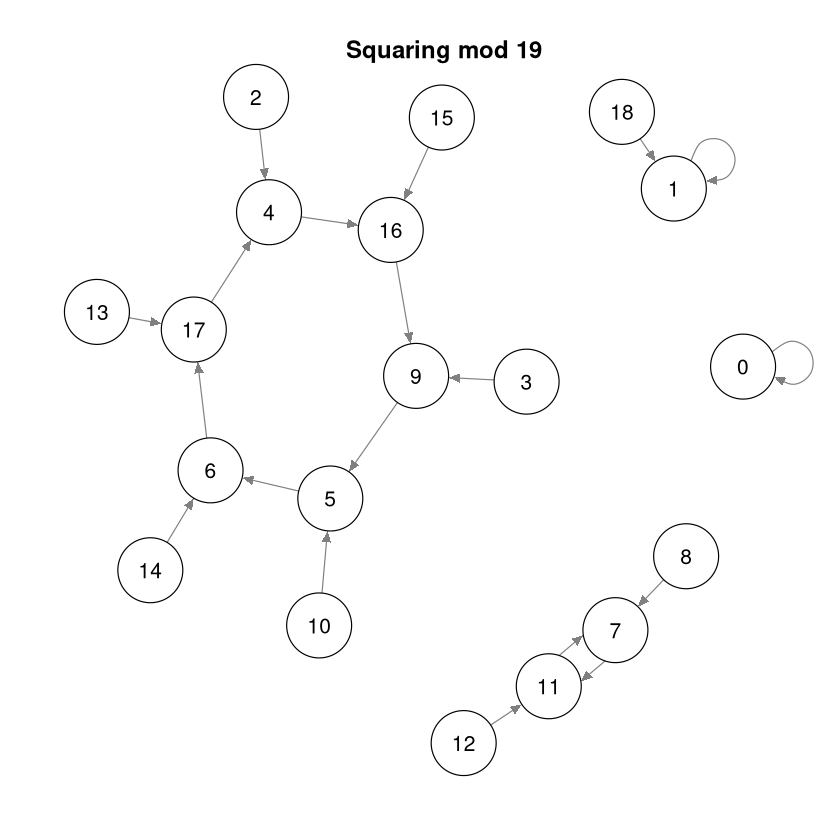

In [4]:
num_steps <- 100

make_graph(19, num_steps)